In [2]:
import nltk
import pandas as pd
import numpy as np

In [5]:
dataset=pd.read_csv("SMSSpamCollection.csv",sep="\t",header=None)
dataset.columns=["label","body_text"]
dataset.head()

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
dataset["body_text"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
dataset["body_text"][1]

'Ok lar... Joking wif u oni...'

In [8]:
#shape of the data
print("Input data has {} rows and {} columns". format(len(dataset),len(dataset.columns)))

Input data has 5572 rows and 2 columns


In [9]:
print("Out of {} rows, are spam {} and {} are ham".format(len(dataset),len(dataset[dataset['label']=='spam']),len(dataset[dataset['label']=='ham'])))

Out of 5572 rows, are spam 747 and 4825 are ham


In [11]:
#missing data
print("Number of null in label: {}".format(dataset['label'].isnull().sum()))
print("Number of null in text: {}".format(dataset['body_text'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punct(text):
  text_nopunct="".join([char for char in text if char not in string.punctuation])
  return text_nopunct
dataset['body_text_clean']=dataset['body_text'].apply(lambda x:remove_punct(x))
dataset.head()

,label,body_text,body_text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [15]:
import re

In [16]:
def tokenize(text):
  tokens=re.split('\W',text)
  return tokens

dataset['body_text_tokenized']=dataset['body_text_clean'].apply(lambda x:tokenize(x.lower()))
dataset.head()


,label,body_text,body_text_clean,body_text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
stopwords= nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
  text=[word for word in tokenized_list if word not in stopwords]
  return text
dataset['body_text_nostop']=dataset['body_text_tokenized'].apply(lambda x:remove_stopwords(x))
dataset.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


In [30]:
import nltk
nltk.download('wordnet')

wn=nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
  text=[wn.lemmatize(word) for word in tokenized_text]
  return text
dataset['body_text_lemmatized']=dataset['body_text_nostop'].apply(lambda x:lemmatizing(x))
dataset.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"


In [33]:
#vectorization- encoding texts as integers to create feature vectors
#count vectorization- creates doc term matrix(no. of times the term occured in a doc)
from sklearn.feature_extraction.text import CountVectorizer

def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens=re.split('\W',text)
  text=[ps.stem(word) for word in tokens if word not in stopwords]
  return text

count_vect=CountVectorizer(analyzer=clean_text)
X_count=count_vect.fit_transform(dataset['body_text'])
print(X_count.shape)

(5572, 8109)


In [35]:
data_sample=dataset[0:20]
count_vect_sample=CountVectorizer(analyzer=clean_text)
X_count_sample=count_vect_sample.fit_transform(data_sample['body_text'])

print(X_count_sample.shape)

(20, 222)


In [38]:
#sparse matrix-matrix with most 0's. so it only stores non-zero value locations
X_count_sample
x_counts_df=pd.DataFrame(X_count_sample.toarray())
x_counts_df

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,221
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect=TfidfVectorizer(analyzer=clean_text)
X_tfidf=tfidf_vect.fit_transform(dataset['body_text'])

print(X_tfidf.shape)

(5572, 8109)


In [44]:
#applying to small sample
data_sample=dataset[0:20]
tfidf_vect_sample=TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample=tfidf_vect_sample.fit_transform(data_sample['body_text'])
print(X_tfidf_sample.shape)

(20, 222)


In [47]:
x_tfidf_df=pd.DataFrame(X_tfidf_sample.toarray())
x_tfidf_df.columns=tfidf_vect_sample.get_feature_names_out() # Use get_feature_names_out() instead of get_feature_names()
x_tfidf_df

,,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150,...,wkli,wonder,wont,word,world,wwwdbuknet,xxx,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye
0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0000,0.198423,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.198423,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.170093,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.234097,...,0.000000,0.000000,0.000000,0.185680,0.00,0.000000,0.234097,0.000000,0.000000,0.000000
6,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.165977,0.0000,0.000000,0.228432,0.000000,0.000000,0.000000,0.0000,0.228432,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.1971,0.000000,0.000000,0.000000,0.000000,0.000000,0.1971,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000


Feature Engineering: Feature creation

In [48]:
dataset=pd.read_csv("SMSSpamCollection.csv",sep="\t",header=None)
dataset.columns=["label","body_text"]
dataset.head()

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
#create feature for text message length
dataset['body_len']=dataset['body_text'].apply(lambda x:len(x)-x.count(" "))
dataset.head()

,label,body_text,body_len
0,ham,"Go until jurong point, crazy.. Available only ...",92
1,ham,Ok lar... Joking wif u oni...,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
3,ham,U dun say so early hor... U c already then say...,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",49


In [51]:
#creating feature for % of text that is punctuation
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100
dataset['punct%']=dataset['body_text'].apply(lambda x:count_punct(x))
dataset.head()

,label,body_text,body_len,punct%
0,ham,"Go until jurong point, crazy.. Available only ...",92,9.8
1,ham,Ok lar... Joking wif u oni...,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
3,ham,U dun say so early hor... U c already then say...,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1


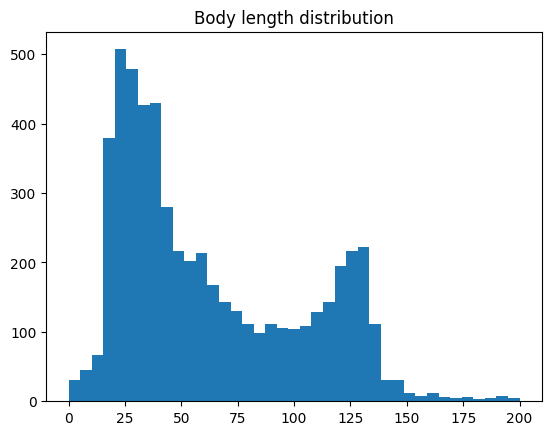

In [52]:
import matplotlib.pyplot as plt
import numpy as np
bins=np.linspace(0,200,40)
plt.hist(dataset['body_len'],bins)
plt.title("Body length distribution")
plt.show()

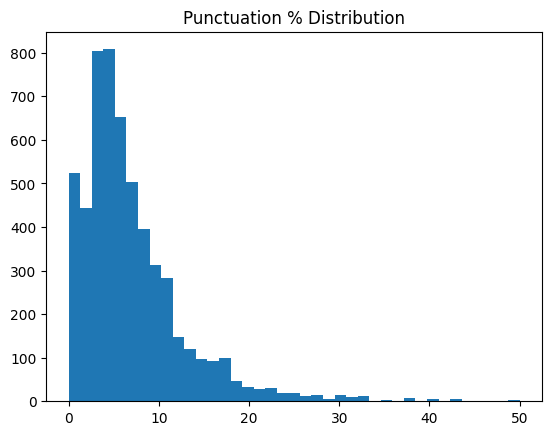

In [53]:
bins=np.linspace(0,50,40)

plt.hist(dataset['punct%'],bins)
plt.title("Punctuation % Distribution")
plt.show()